In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import MultiLabelBinarizer

# import pyspark as ps    # for the pyspark suite
# from pyspark.sql.types import StructType, StructField
# from pyspark.sql.types import IntegerType, StringType, FloatType, DateType, TimestampType
# import pyspark.sql.functions as F


In [41]:
# make anime_final_2
# scoresdf = pd.read_csv('animelists_cleaned.csv')
# scoresdf = scoresdf[['username', 'anime_id', 'my_status', 'my_score', 'my_watched_episodes']]
# userlist = pd.read_csv('UserList.csv')

# scoresdf = scoresdf[(scoresdf['my_status'] == 1) | (scoresdf['my_status'] == 2) | (scoresdf['my_status'] == 3)]

# scoresdf = scoresdf.merge(userlist, on = 'username')
# scoresdf = scoresdf[['anime_id','username', 'my_score', 'user_id', 'stats_mean_score', 'my_watched_episodes', 'my_status']]
# scoresdf = scoresdf[scoresdf['my_watched_episodes']>3]
# # scoresdf = scoresdf[scoresdf['my_status'] < 3]
scoresdf

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31284025,Yokonightcore,15611,48,2014-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:33:03,NaN
31284026,Yokonightcore,27815,22,0000-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:32:05,NaN
31284027,wargod,5945,39,0000-00-00,0000-00-00,8,2,0.0,0,2010-03-29 04:24:12,NaN
31284028,JMc_SetoKai_LoVe,1316,52,0000-00-00,0000-00-00,9,2,NaN,0,2009-12-23 05:45:14,NaN


In [ ]:
# # make anime_final_3
scoresdf = pd.read_csv('animelists_cleaned.csv')
# scoresdf = scoresdf[['username', 'anime_id', 'my_status', 'my_score', 'my_watched_episodes']]
userlist = pd.read_csv('UserList.csv')

# scoresdf = scoresdf[(scoresdf['my_status'] == 1) | (scoresdf['my_status'] == 2) | (scoresdf['my_status'] == 3 | (scoresdf['my_status'] == 4))]

scoresdf = scoresdf.merge(userlist, on = 'username')
# scoresdf = scoresdf[['anime_id','username', 'my_score', 'user_id', 'stats_mean_score', 'my_watched_episodes', 'my_status']]
# scoresdf = scoresdf[scoresdf['my_watched_episodes']>3]
# scoresdf = scoresdf[scoresdf['my_status'] < 3]
scoresdf= scoresdf.groupby('username').filter(lambda x : len(x)>7)
scoresdf= scoresdf.groupby('anime_id').filter(lambda x : len(x)>7)


scoresdf.value_counts()

In [22]:
scoresdf= scoresdf.groupby('username').filter(lambda x : len(x)>5)
# scoresdf = scoresdf[scoresdf.groupby('username').index.transform(len) > 3]

In [34]:
# scoresdf = scoresdf.drop(['username', 'my_status', 'my_watched_episodes'], axis = 1)
scoresdf.to_csv('final_anime_2.csv')
# scoresdf

In [20]:
# scoresdf = scoresdf.drop('Unnamed: 0', axis = 1)
# anime = anime.drop(['title', 'title_english', 'title_japanese',
#        'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
#        'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
#        'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
#        'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
#        'genre', 'opening_theme', 'ending_theme'], axis = 1)
scoresdf.to_csv('final_anime.csv')
# scoresdf.my_status.value_counts()

In [38]:
userprofile_2255153 = scoresdf[scoresdf['user_id'] == 2255153]
userprofile_2255153.to_csv('test_user_profile.csv')

(0, 2000)

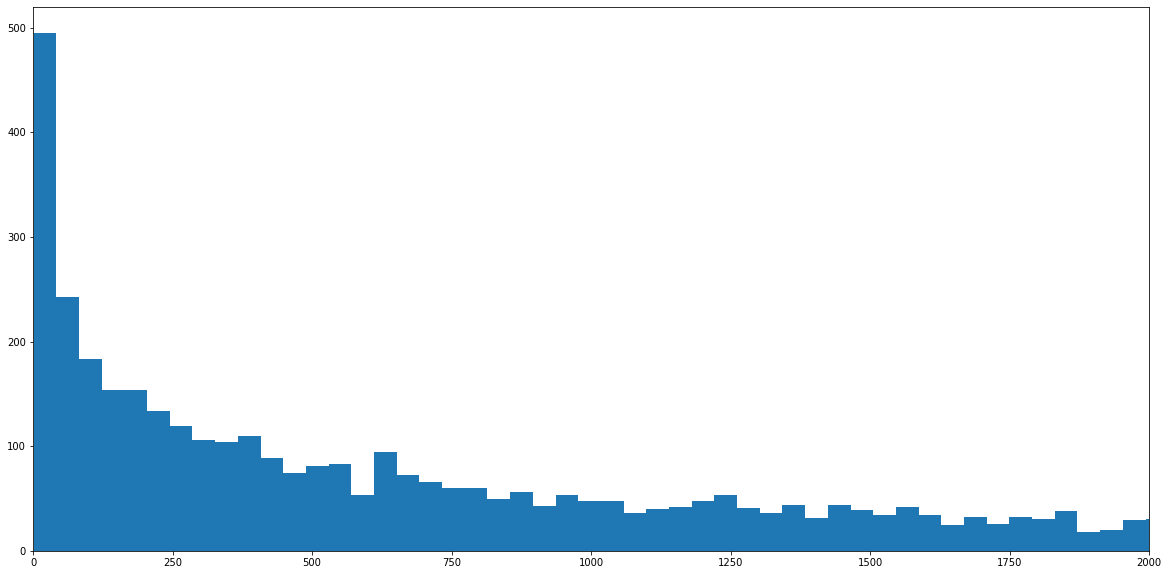

In [42]:

fig, ax = plt.subplots(figsize = (20,10))
ax.hist(scoresdf.anime_id.value_counts(), bins = 2000)
ax.set_xlim(0,2000)

(0, 1500)

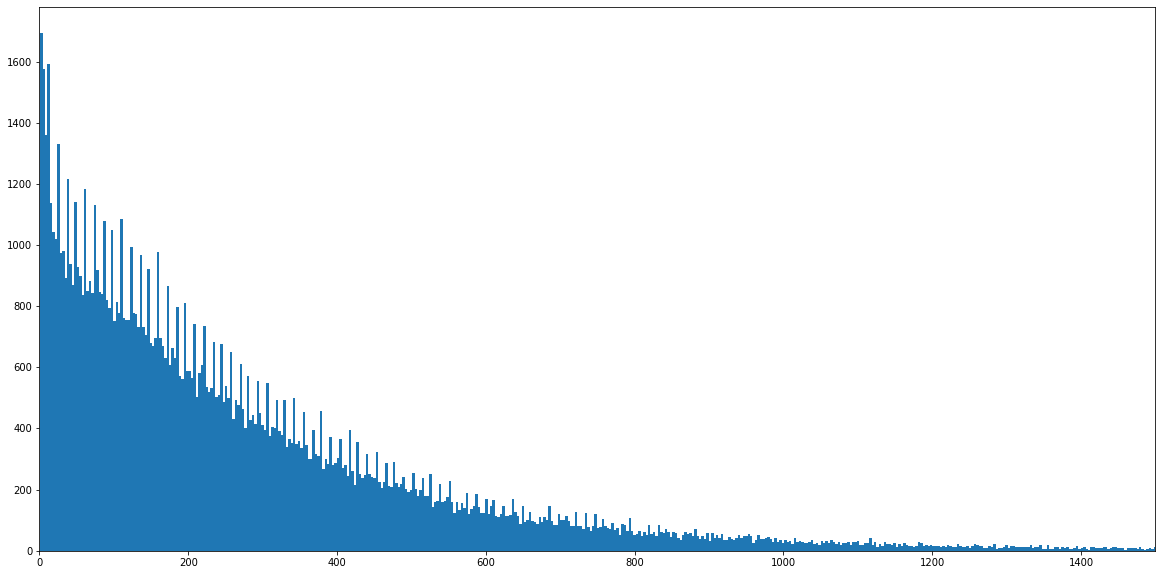

In [43]:
fig, ax = plt.subplots(figsize = (20,10))
ax.hist(scoresdf.username.value_counts().values, bins = 2000)
ax.set_xlim(0,1500)

Text(0.5, 1.0, 'Counts of each score given by a User')

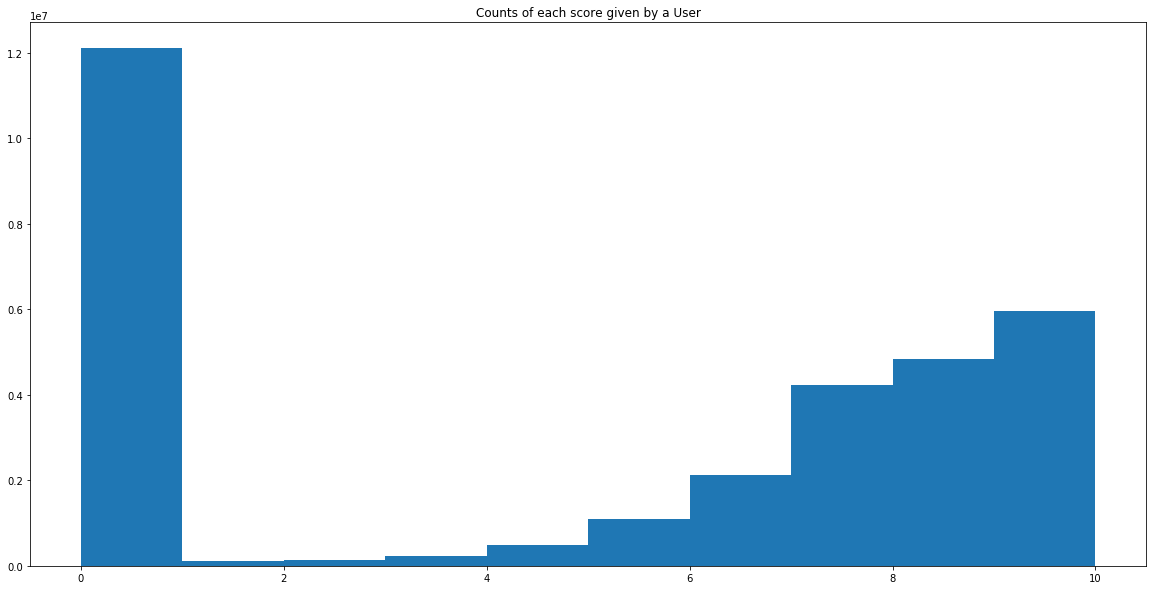

In [44]:
# len(scoresdf.username.unique()) =108710
# len(scoresdf.anime_id.unique()) =  666
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(scoresdf.my_score)
ax.set_title('Counts of each score given by a User')

Text(0.5, 1.0, "histogram of the anime's average ratings")

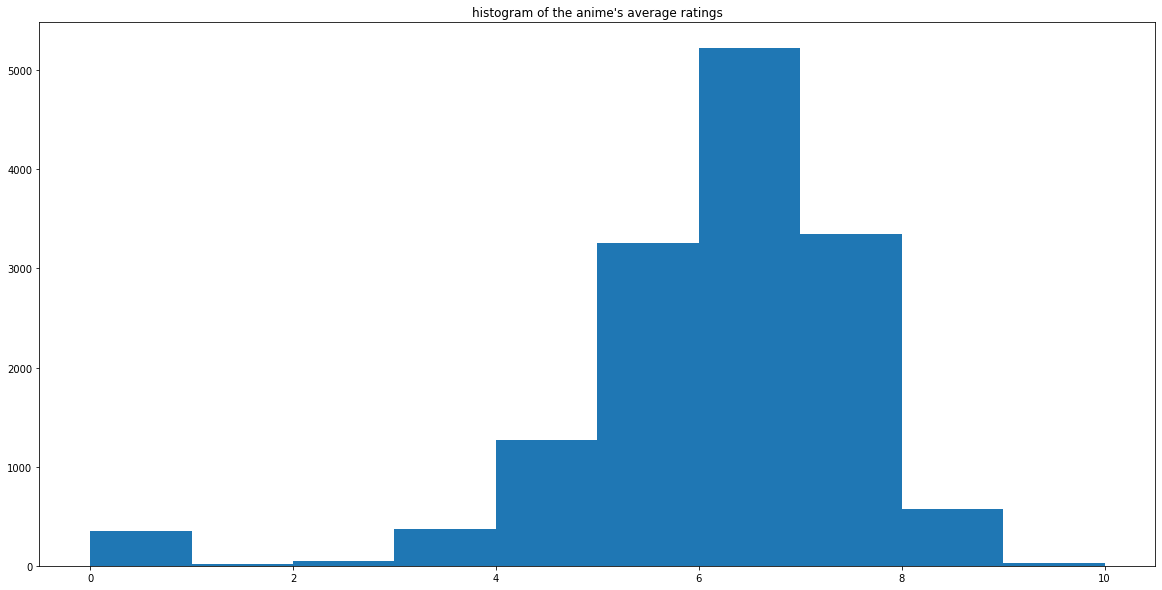

In [26]:
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(animedf.score)
ax.set_title("histogram of the anime's average ratings")

In [4]:
df

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,1362307973,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,1362923691,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,1367081015,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,1362308037,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,1364399953,NaN
...,...,...,...,...,...,...,...,...,...,...,...
80076107,mini_kaila,5940,4,0000-00-00,0000-00-00,8,1,0.0,0,1256326186,NaN
80076108,mini_kaila,6030,0,0000-00-00,0000-00-00,0,4,NaN,0,1254150549,NaN
80076109,mini_kaila,6500,1,0000-00-00,0000-00-00,8,3,0.0,0,1263503239,NaN
80076110,mini_kaila,7058,0,0000-00-00,0000-00-00,8,3,0.0,0,1272110959,NaN


In [ ]:
# df.my_last_updated.max() = 1526976068
# df.my_last_updated = pd.to_datetime(df.my_last_updated, unit = 's')
# df['username'].value_counts()
frequencies = df['username'].value_counts()

condition = frequencies<5   # you can define it however you want
mask_obs = frequencies[condition].index
mask_dict = dict.fromkeys(mask_obs, 'miscellaneous')

df['username'] = df['username'].replace(mask_dict) 

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(df['username'].dropna())

(array([9257004., 9143049., 9222267., 9218187., 8946635., 6809545.,
        6838481., 6911013., 6895588., 6834082.]),
 array([     0. ,  28304.3,  56608.6,  84912.9, 113217.2, 141521.5,
        169825.8, 198130.1, 226434.4, 254738.7, 283043. ]),
 <a list of 10 Patch objects>)

Error in callback <function flush_figures at 0x123071950> (for post_execute):


KeyboardInterrupt: 

In [16]:
df.describe()

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated
count,8.007611e+07,8.007611e+07,8.007611e+07,8.007611e+07,6.333426e+07,8.007611e+07,8.007611e+07
mean,1.196189e+04,1.396328e+01,4.338410e+00,3.035068e+00,7.239367e-04,7.406522e+00,1.383827e+09
std,1.143202e+04,3.391269e+02,3.933398e+00,1.746709e+00,2.689633e-02,1.110973e+04,1.401150e+08
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.762000e+03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.323886e+09
50%,8.476000e+03,3.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.404043e+09
75%,2.047900e+04,1.300000e+01,8.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.467512e+09
max,3.791600e+04,6.553500e+04,1.000000e+01,5.500000e+01,1.000000e+00,1.677722e+07,1.526976e+09


In [42]:
# df_clean.username.isnull().sum() = 261
print(f'the null count in username is {df_clean.username.isnull().sum()}')
print(f'the null count in anime_id is {df_clean.anime_id.isnull().sum()}')
print(f'the null count in my_watched_episodes is {df_clean.my_watched_episodes.isnull().sum()}')
print(f'the null count in my_score is {df_clean.my_score.isnull().sum()}')
print(f'the null count in my_status is {df_clean.my_status.isnull().sum()}')
print(f'the null count in my_rewatching is {df_clean.my_rewatching.isnull().sum()}')
print(f'the null count in my_last_updated is {df_clean.my_last_updated.isnull().sum()}')

the null count in username is 261
the null count in anime_id is 0
the null count in my_watched_episodes is 0
the null count in my_score is 0
the null count in my_status is 0
the null count in my_rewatching is 0
the null count in my_last_updated is 0


In [36]:
df_clean['my_rewatching']= df_clean['my_rewatching'].fillna(0)
df_clean['my_rewatching'].value_counts()

0.0    80030262
1.0       45850
Name: my_rewatching, dtype: int64

In [28]:
df2 = None

In [65]:
# df3.last_online.max() =  '2018-05-25 12:50:00'
# df3.last_online.min() = '2007-04-09 16:16:00'

'2007-04-09 16:16:00'

In [14]:
# uniques
# len(df.username.unique()) = 283045
# len(df.anime_id.unique()) = 14478

In [9]:
userlist = pd.read_csv('UserList.csv')

/Users/JamesSkelton/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/JamesSkelton/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 30922.,    191.,    123.,    260.,   1098.,   5370.,  30245.,
        107064.,  89968.,  37305.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

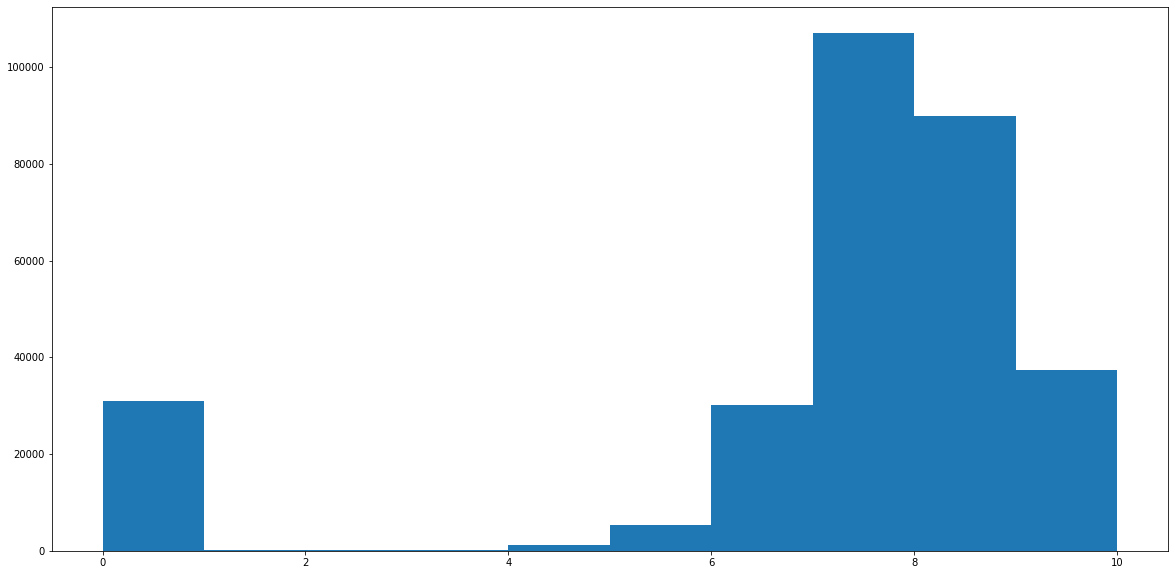

In [5]:
# userlist hist of mean score
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(userlist.stats_mean_score)


In [8]:
# histogram showing counts of ratings by anime and counts of ratings by user ( how many times has each yse)


,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,shuzzable,2347781,36,72,16,2,25,35.48,NaN,NaN,NaN,NaN,2013-03-25,2015-09-09 21:54:00,9.06,7.0,2154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302670,ScruffyPuffy,3119025,0,27,0,0,0,7.92,NaN,NaN,NaN,NaN,2013-09-06,2014-10-10 09:04:00,0.00,0.0,477.0
302671,Torasori,3975907,22,239,0,4,176,86.88,Male,"Latvia, Riga",1998-11-18,NaN,2014-07-30,2018-05-24 21:34:46,8.98,47.0,5313.0
302672,onpc,1268417,5,169,2,5,24,38.36,Male,NaN,NaN,NaN,2012-04-23,2016-12-28 14:35:00,7.72,0.0,2280.0
302673,HMicca,1289601,11,73,2,2,16,119.97,Female,"Birmingham, England",1995-08-12,NaN,2012-05-05,2012-11-15 08:10:00,8.89,11.0,7049.0


In [10]:
df = scoresdf.merge(userlist, on = 'username')

In [33]:
df = df[['anime_id', 'user_id', 'my_watched_episodes', 'my_status', 'my_score', 'stats_mean_score', 'stats_episodes']]

In [34]:
# df = df[['anime_id', 'user_id', 'my_score', 'my_last_updated', 'stats_mean_score']]
# df = df[['anime_id', 'user_id', 'my_score', 'stats_mean_score', 'user_completed', 'user_watching']]
df = df[df['my_watched_episodes']>3]
df = df[df['stats_episodes']>3]
df = df[['anime_id', 'user_id', 'my_score', 'stats_mean_score']]
df

,anime_id,user_id,my_score,stats_mean_score
0,11013,2255153,8,7.43
1,2104,2255153,7,7.43
2,5262,2255153,7,7.43
3,721,2255153,7,7.43
4,12365,2255153,8,7.43
...,...,...,...,...
22691301,1629,336452,0,0.00
22691302,1835,110255,10,10.00
22691303,1728,290011,9,9.00
22691306,1110,223688,10,10.00


In [35]:
df.to_csv('final_dataset.csv')

In [36]:
df

,anime_id,user_id,my_score,stats_mean_score
0,11013,2255153,8,7.43
1,2104,2255153,7,7.43
2,5262,2255153,7,7.43
3,721,2255153,7,7.43
4,12365,2255153,8,7.43
...,...,...,...,...
22691301,1629,336452,0,0.00
22691302,1835,110255,10,10.00
22691303,1728,290011,9,9.00
22691306,1110,223688,10,10.00


In [13]:
print(anime.columns)
print(userlist.columns)

NameError: name 'anime' is not defined

In [ ]:
scoresdf = scoresdf.merge(anime, on = 'anime_id')
scoresdf = scoresdf.merge(userlist, on = 'username')
scoresdf = scoresdf[scoresdf['my_watched_episodes']>0]

scoresdf

In [11]:
# scoresdf = scoresdf[scoresdf['my_watched_episodes']>0]
scoresdf.to_csv('final_dataset.csv')

KeyboardInterrupt: 

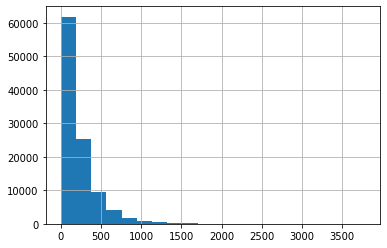

In [31]:
users['anime_id'].hist(bins =20)

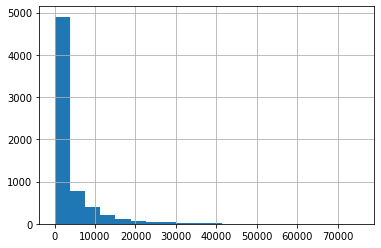

In [33]:
anime['user_id'].hist(bins =20)

In [3]:
import boto3

s3 = boto3.client('s3')

In [4]:
for b in s3.list_buckets()['Buckets']:
    print(b['Name'])

athos.very.first.aws.bucket
aws-logs-478334398153-us-east-2
myanimelist-recommender


In [39]:
userlist = pd.read_csv('final_anime_2.csv')
userlist

,Unnamed: 0,anime_id,username,my_score,user_id,stats_mean_score,my_watched_episodes,my_status
0,0,21,karthiga,9,2255153,7.43,586,1
1,1,59,karthiga,7,2255153,7.43,26,2
2,2,74,karthiga,7,2255153,7.43,26,2
3,3,120,karthiga,7,2255153,7.43,26,2
4,4,178,karthiga,7,2255153,7.43,26,2
...,...,...,...,...,...,...,...,...
21994561,22691303,15611,Yokonightcore,9,4862000,9.00,48,1
21994562,22691304,27815,Yokonightcore,9,4862000,9.00,22,1
21994563,22691305,5945,wargod,8,299167,8.00,39,2
21994564,22691306,1316,JMc_SetoKai_LoVe,9,263803,9.00,52,2


In [27]:
userlist.loc[userlist['username'] == 'Nyaaa-']


,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
18593,Nyaaa-,61503,136,361,0,2,766,115.58,Male,The Netherlands,1991-08-18,NaN,2008-05-18,2018-05-16 18:38:28,8.27,10.0,7039.0
